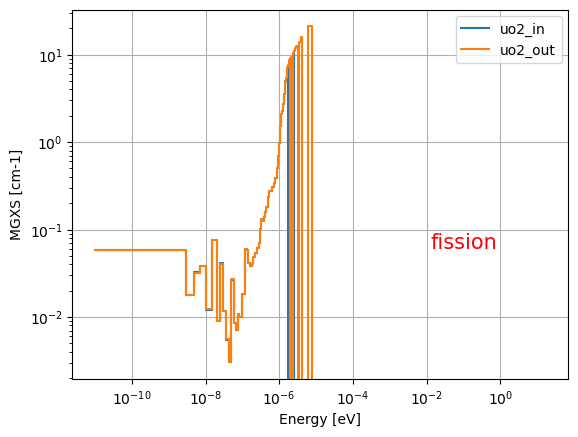

In [16]:
import sys
import os 
import openmc
import numpy as np
import matplotlib.pyplot as plt
import openmc.mgxs as mgxs
import pandas as pd

notebook_directory = %pwd

#Choose reaction and cell to plot

reaction = 'fission'
mat = 'uo2_in'
mat2 = 'uo2_out'


csv_file_path_xs = os.path.join(notebook_directory, "mgxs", f"{reaction}_{mat}_mgxs.csv")
csv_file_path_energy = os.path.join(notebook_directory, "mgxs", "energy_groups.csv")
csv_file_path_xs2 = os.path.join(notebook_directory, "mgxs", f"{reaction}_{mat2}_mgxs.csv")


df_xs = pd.read_csv(csv_file_path_xs)
mgxs = df_xs['mean'].values
df_xs2=pd.read_csv(csv_file_path_xs2)
mgxs2 = df_xs2['mean'].values


df_energy = pd.read_csv(csv_file_path_energy)
energy = df_energy['0'].values
name_energy = df_energy['1'].values[1]

fig, ax = plt.subplots()
ax.step(energy[:-1], mgxs, where='post', label=mat) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('MGXS [cm-1]')
ax.grid()
ax.step(energy[:-1], mgxs2, where='post', label=mat2)  
bbox = ax.get_position()
ax.text(bbox.x1 - 0.05, bbox.y0 - 0.05, reaction, fontsize=15, color='red', ha='right')
ax.legend()
plt.show()
